In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi.newsapi_client import NewsApiClient
from dotenv import load_dotenv

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
load_dotenv()

True

In [4]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=os.environ['NEWS_API_KEY'])

In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles=newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')

In [6]:
# Fetch the Ethereum news articles
ethereum_articles=newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
    except AttributeError:
        pass
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
    except AttributeError:
        pass
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
3,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.337775,0.014100,0.909450,0.076350
std,0.348007,0.036248,0.051351,0.050824
min,-0.346400,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.910000,0.045000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.187035,0.021000,0.911412,0.067471
std,0.414909,0.042524,0.083774,0.083151
min,-0.670500,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.879000,0.000000
50%,0.273200,0.000000,0.910000,0.057000
75%,0.507000,0.000000,1.000000,0.090000
max,0.919800,0.143000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

In [13]:
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...


In [14]:
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [15]:
# Create a new tokens column for bitcoin
bitcoin_tokens=[]
for article_text in bitcoin_df['text']:
    article_tokens= tokenizer(article_text)
    bitcoin_tokens.append(article_tokens)

In [16]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_tokens
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, ha, drinking, lot, youd, better,..."
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ullifamed, investor, michael, novogratz, twee..."


In [17]:
ethereum_tokens=[]
for article_text in ethereum_df['text']:
    article_tokens= tokenizer(article_text)
    ethereum_tokens.append(article_tokens)

In [18]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_tokens
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editors, noteandreessen, horowitzs, crypto, s..."
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
btc_flat_list = []
for sublist in bitcoin_tokens:
    for item in sublist:
        btc_flat_list.append(item)
bigram_counts_btc = Counter(ngrams(btc_flat_list, n=2))
dict(bigram_counts_btc.most_common(23))

{('satoshi', 'nakaboto'): 24,
 ('char', 'robot'): 12,
 ('robot', 'colleague'): 12,
 ('colleague', 'satoshi'): 12,
 ('nakaboto', 'writes'): 12,
 ('writes', 'bitcoin'): 12,
 ('every', 'fucking'): 12,
 ('fucking', 'daywelcome'): 12,
 ('daywelcome', 'another'): 12,
 ('another', 'edition'): 12,
 ('edition', 'bitcoin'): 12,
 ('bitcoin', 'today'): 12,
 ('today', 'satoshi'): 12,
 ('nakaboto', 'tell'): 12,
 ('tell', 'whats'): 12,
 ('whats', 'going'): 12,
 ('going', 'bitcoin'): 12,
 ('bitcoin', 'char'): 12,
 ('bitcoin', 'btc'): 11,
 ('btc', 'every'): 11,
 ('jk', 'rowling'): 1,
 ('rowling', 'ha'): 1,
 ('ha', 'drinking'): 1}

In [21]:
# Generate the Ethereum N-grams where N=2
eth_flat_list = []
for sublist in ethereum_tokens:
    for item in sublist:
        eth_flat_list.append(item)
bigram_counts_eth = Counter(ngrams(eth_flat_list, n=2))
dict(bigram_counts_eth.most_common(23))

{('satoshi', 'nakaboto'): 6,
 ('robot', 'colleague'): 3,
 ('colleague', 'satoshi'): 3,
 ('nakaboto', 'writes'): 3,
 ('writes', 'bitcoin'): 3,
 ('bitcoin', 'btc'): 3,
 ('btc', 'every'): 3,
 ('every', 'fucking'): 3,
 ('fucking', 'daywelcome'): 3,
 ('daywelcome', 'another'): 3,
 ('another', 'edition'): 3,
 ('edition', 'bitcoin'): 3,
 ('bitcoin', 'today'): 3,
 ('today', 'satoshi'): 3,
 ('nakaboto', 'tell'): 3,
 ('tell', 'whats'): 3,
 ('whats', 'going'): 3,
 ('going', 'bitcoin'): 3,
 ('bitcoin', 'char'): 3,
 ('open', 'source'): 2,
 ('char', 'robot'): 2,
 ('char', 'opinions'): 2,
 ('opinions', 'expressed'): 2}

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin
btc_counts=Counter(ngrams(btc_flat_list, n=1))
btc_counts.most_common(10)

[(('bitcoin',), 42),
 (('satoshi',), 24),
 (('nakaboto',), 24),
 (('char',), 20),
 (('another',), 13),
 (('robot',), 12),
 (('colleague',), 12),
 (('writes',), 12),
 (('every',), 12),
 (('fucking',), 12)]

In [24]:
# Get the top 10 words for Ethereum
eth_counts=Counter(ngrams(eth_flat_list, n=1))
eth_counts.most_common(10)

[(('char',), 17),
 (('bitcoin',), 12),
 (('satoshi',), 6),
 (('nakaboto',), 6),
 (('another',), 4),
 (('crypto',), 4),
 (('robot',), 3),
 (('colleague',), 3),
 (('writes',), 3),
 (('btc',), 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

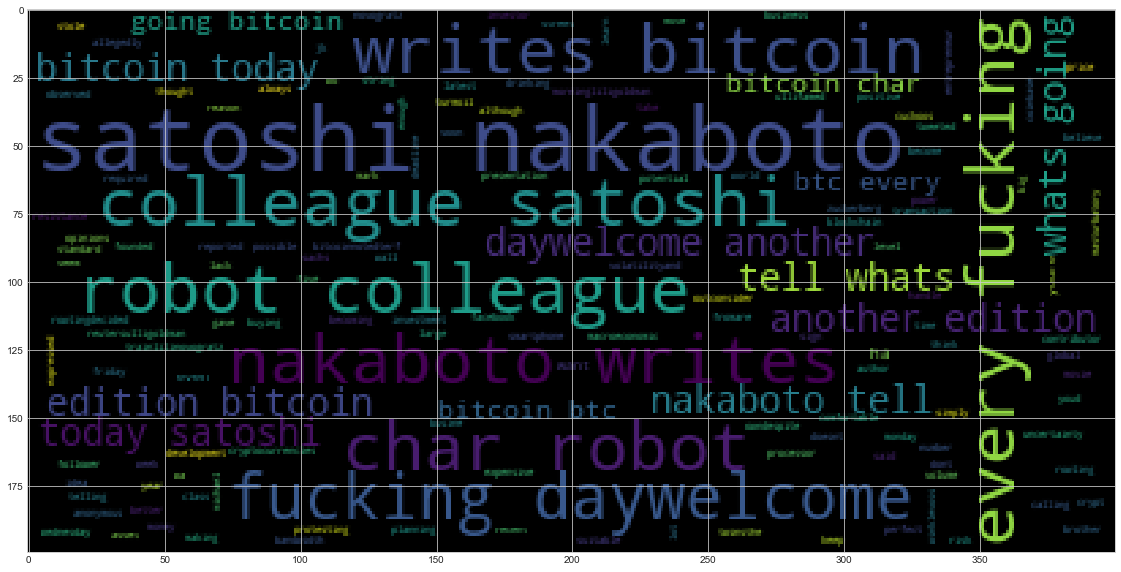

In [26]:
# Generate the Bitcoin word cloud
btc_string = ' '.join([str(elem) for elem in btc_flat_list]) 
wc = WordCloud().generate(btc_string)
plt.imshow(wc)

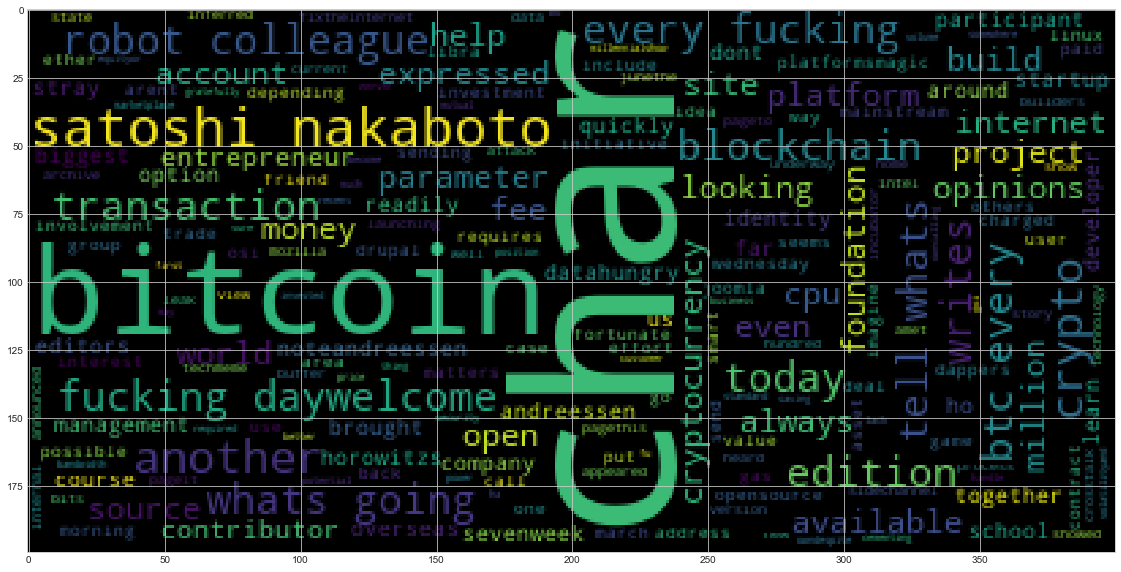

In [27]:
# Generate the Ethereum word cloud
eth_string = ' '.join([str(elem) for elem in eth_flat_list]) 
wc2 = WordCloud().generate(eth_string)
plt.imshow(wc2)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [31]:
# Concatenate all of the bitcoin text together
btc_concat = ' '.join(bitcoin_df['text'])

In [32]:
# Run the NER processor on all of the text
doc = nlp(btc_concat)

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
The Winklevoss WORK_OF_ART
Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON


---

## Ethereum NER

In [35]:
# Concatenate all of the ethereum text together
eth_concat = ' '.join(ethereum_df['text'])

In [36]:
# Run the NER processor on all of the text
doc2 = nlp(eth_concat)
# Add a title to the document

In [37]:
# Render the visualization
displacy.render(doc2, style='ent')

In [38]:
# List all Entities
for ent in doc2.ents:
    print(ent.text, ent.label_)

Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
Intel ORG
CrossTalk ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Techmeme ORG
1:25 TIME
June 13 DATE
2020 DATE
Blockchain GPE
first ORDINAL
blockchain GPE
Bitcoin GPE
Bitcoin PERSON
2020 DATE
a big year DATE
Bitcoin GPE
